In [2]:
import numpy as np

In [11]:
data = np.random.rand(1000,5)

data

array([[0.71650859, 0.97137368, 0.0990587 , 0.78630485, 0.28259677],
       [0.63329509, 0.09542965, 0.3335535 , 0.28391305, 0.63722382],
       [0.67558836, 0.17378588, 0.29820818, 0.89937915, 0.54000941],
       ...,
       [0.90818105, 0.68607036, 0.26067553, 0.19929316, 0.96610793],
       [0.93999258, 0.43180264, 0.59631704, 0.05873384, 0.41514976],
       [0.53616425, 0.9117036 , 0.03129277, 0.89350387, 0.58556149]])

In [12]:
data -= data.mean(axis=0)
data

array([[ 0.22576688,  0.48403674, -0.39143044,  0.28017122, -0.23222364],
       [ 0.14255337, -0.39190729, -0.15693564, -0.22222058,  0.12240341],
       [ 0.18484664, -0.31355106, -0.19228097,  0.39324552,  0.025189  ],
       ...,
       [ 0.41743933,  0.19873342, -0.22981362, -0.30684047,  0.45128752],
       [ 0.44925086, -0.0555343 ,  0.1058279 , -0.44739979, -0.09967065],
       [ 0.04542254,  0.42436665, -0.45919637,  0.38737024,  0.07074107]])

In [13]:
data /= data.std(axis=0)
data

array([[ 0.79255333,  1.64444325, -1.34864095,  0.9793056 , -0.82795145],
       [ 0.50043281, -1.33144706, -0.54070868, -0.77674594,  0.43640724],
       [ 0.6489031 , -1.06524337, -0.66248804,  1.37454353,  0.08980682],
       ...,
       [ 1.4654184 ,  0.67516741, -0.79180366, -1.07252481,  1.60898414],
       [ 1.5770926 , -0.18866959,  0.36462122, -1.56383342, -0.3553577 ],
       [ 0.15945556,  1.44172296, -1.58212282,  1.35400716,  0.25221453]])

In [3]:
k = 4
num_validation_samples = len(data) // k

np.random.shuffle(data)

validation_scores = []

In [4]:
for fold in range(k):
    validation_data = data[num_validation_samples * fold: num_validation_samples * (fold + 1)]   
    training_data = data[:num_validation_samples * fold] + data[num_validation_samples * (fold + 1):] 
    print(validation_data.shape)

ValueError: operands could not be broadcast together with shapes (0,2) (750,2) 

In [5]:
c = np.random.rand(6)

In [6]:
1
print(c[:1])
print(c[2:])

[0.97618084]
[0.24252952 0.01659506 0.00089619 0.1914711 ]


In [7]:
2
print(c[:2])
print(c[3:])

[0.97618084 0.58652203]
[0.01659506 0.00089619 0.1914711 ]


In [8]:
c[4:]

array([0.00089619, 0.1914711 ])

In [5]:
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)

In [6]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))        
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.                          
    return results

In [8]:
x_train = vectorize_sequences(train_data)  
x_test = vectorize_sequences(test_data)
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [42]:
from keras import models
from keras import layers
import tensorflow as tf

model = models.Sequential()
model.add(layers.Dense(4, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [43]:
# Split out validation
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [44]:
with tf.Session(config=tf.ConfigProto(log_device_placement=True)):

    history = model.fit(partial_x_train,
                        partial_y_train,
                        epochs=20,
                        batch_size=512,
                        validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 92s 6ms/step - loss: 0.6060 - acc: 0.7676 - val_loss: 0.5302 - val_acc: 0.8227
Epoch 2/20
15000/15000 [==============================] - 4s 265us/step - loss: 0.4609 - acc: 0.8791 - val_loss: 0.4329 - val_acc: 0.8642
Epoch 3/20
15000/15000 [==============================] - 4s 253us/step - loss: 0.3681 - acc: 0.9021 - val_loss: 0.3696 - val_acc: 0.8747
Epoch 4/20
15000/15000 [==============================] - 4s 254us/step - loss: 0.3056 - acc: 0.9133 - val_loss: 0.3310 - val_acc: 0.8821
Epoch 5/20
15000/15000 [==============================] - 4s 273us/step - loss: 0.2610 - acc: 0.9247 - val_loss: 0.3113 - val_acc: 0.8809
Epoch 6/20
15000/15000 [==============================] - 4s 282us/step - loss: 0.2272 - acc: 0.9316 - val_loss: 0.3007 - val_acc: 0.8819
Epoch 7/20
15000/15000 [==============================] - 4s 288us/step - loss: 0.2010 - acc: 0.9392 - val_loss: 0.2813 - v

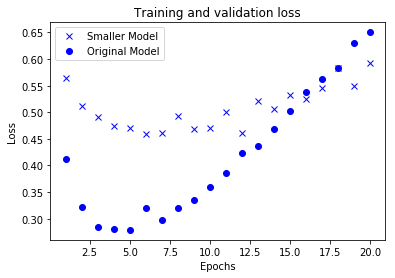

In [37]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values_small = history_dict['val_loss']
acc = history_dict['acc']
val_acc = history_dict['acc']



epochs = range(1, len(acc) + 1)

plt.plot(epochs, val_loss_values_small, 'bx', label='Smaller Model')           
plt.plot(epochs, val_loss_values, 'bo', label='Original Model')      
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 3030267609334469853, name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 206553088
 locality {
   bus_id: 1
 }
 incarnation: 2082932716900519767
 physical_device_desc: "device: 0, name: GeForce GPU, pci bus id: 0000:01:00.0, compute capability: 5.0"]